# Alternative Infill Strategies for Expensive Multi-Objective Optimisation
A. Rahat, R. Everson, and J. Fieldsend.<br />
Department of Computer Science, University of Exeter, UK.

>This repository contains Python code for the infill streategies presented in __Alternative Infill Strategies for Expensive Multi-Objective Optimisation__ by A. Rahat, R. Everson and J. Fieldsend, to appear in GECCO 2017 proceedings. Please refer to the _LICENSE_ before using the code. 

>Preprint repository: https://ore.exeter.ac.uk/repository/handle/10871/27157


## Pre-requisits.

The code here is a __Python3__ implementation of the infill strategies. The following modules are necessary to run the code here. 

* [DEAP](https://github.com/DEAP/deap)
* [Numpy](http://www.numpy.org/)
* [SciPy](https://www.scipy.org/)
* [matplotlib](https://matplotlib.org/2.0.0/index.html)
* [PyDOE](https://pythonhosted.org/pyDOE/)
* [evoalgos](https://ls11-www.cs.tu-dortmund.de/people/swessing/evoalgos/doc/)
* [GPy](https://github.com/SheffieldML/GPy)
* [CMA](https://www.lri.fr/~hansen/html-pythoncma/frames.html)

To install any of these modules, just issue the following command in your terminal. 

`$ pip install module_name`

To install a module from github, use appropriate command. For instance:

`$ pip install git+https://github.com/DEAP/deap`

In addition to these, we used a custom module written in _C_ for dominance comparison. The code is given in the repository. To install the module, use the following command wihtin the _FrontCalc_ directory.

`$ python setup.py install`

> __Note.__ As Python installations differ quite significantly, there may be other dependencies, but these should be standard modules from PyPi. If running the code results in complaints that something could not be imported, then please install the relevant module using _pip_.

## Setting up.

The multi-objective evolutionary optimiser method (_IscaOpt.Optimiser.EMO_) requires a _settings_ dictionary along with the multi-objective function and associated arguments or keyword arguments. We list the the most pertinent settings below. 

* n_dim (int): the number of dimensions in the parameter space.
* n_obj (int): the number of objectives, i.e. objective space dimensions.
* lb (list or numpy array): an array of lower bounds in parameter space (1 in each dimension).
* ub (list or numpy array): an array of upper bounds in parameter space (1 in each dimension).
* ref_vector (list or numpy array): reference vector in the objective space.
* method_name (str): the method to use for performing multi-objective optimisation (deafulats to 'HypI'). Options are:
    - 'HypI'
    - 'MSD'
    - 'DomRank'
    - 'MPoI'
    - 'SMSEGO'
    - 'ParEGO'
* budget (int): the budget on the number of function evaluations.
* n_samples (int): the number of initial samples.
* kern_name (str): the kernel function to be used with Gaussian Processes. Defaults to __'Matern52'__. Please refer to GPy documentation for other options. 
* s_vector (int): the number of scalarisation vectors for ParEGO.
* maxfevals (int): the maximum number of function evaluations for infill criterion optimisation using CMA-ES. Defaults to $20000d$, where $d$ is the number of dimensions in parameter space.  
* multisurrogate (bool): whether to use a multi-surrogate approach or not. Defaults to __False__, i.e. use a mono-surrogate approach. 
* cma_options (dict): dictionary of settings for Hansen's CMA-ES code. See [CMA-ES documentation](https://www.lri.fr/~hansen/html-pythoncma/frames.html) for more details on avaialble options.
* cma_sigma (float): the extent of the standard deviation for CMA-ES. See [CMA-ES documentation](https://www.lri.fr/~hansen/html-pythoncma/frames.html) for details. 
* init_file (str): intial design file. It should be a __.npz__ file with 'arr_0' set to decision variables matrix $X \in \mathbb{R}^{M \times n}$ and 'arr_1' for corresponding function response vector $\mathbf{f} \in \mathbb{R}^{M \times D}$ (please refer to the paper for details on notations).
* visualise (bool): it allows basic visualisations. Only available for the following cases: __n_obj=2__; __n_obj=1 and n_dim=2__; __n_obj=1 and n_dim=1__.

> __Notes__<br />
> * This package can be used for single objective Bayesian optimisation. To do so, specify the method by setting **method_name** to **'EGO'**, and of course **n_obj** to **1** with an appropriate function. <br />
> * For one-dimensional search space and a single objective problem, we just use a grid-search instead of CMA-ES. 




## Running the optimiser.

To run the optimiser it is sufficient to define an objective function that may produce a response given a decision vector, and use appropriate settings to call the multi-objective evolutionary optimiser method (_IscaOpt.Optimiser.EMO_). Here we give an example of using the optimiser. 

### An example.

_Problem description_: Use the optimiser to solve $2$-objective __DTLZ2__ problem, starting with $65$ initial LHS samples and a budget of $100$. 

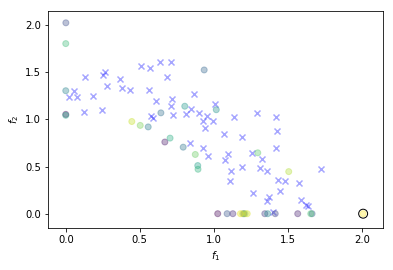

In [1]:
from IPython.display import clear_output
# example set up
import numpy as np
# import optimiser codes
import IscaOpt

settings = {\
    'n_dim': 6,\
    'n_obj': 2,\
    'lb': np.zeros(6),\
    'ub': np.ones(6),\
    'ref_vector': [2.5]*2,\
    'method_name': 'HypI',\
    'budget':100,\
    'n_samples':65,\
    'visualise':True}

# function settings
from deap import benchmarks as BM
fun = BM.dtlz2
args = (2,) # number of objectives as argument

# optimise
res = IscaOpt.Optimiser.EMO(fun, args, settings=settings)
clear_output()

In the Figure above, the blue crosses show the initial samples, and the solid circle show the newly sampled solutions with darker colours showing earlier samples. The black encircled solid is the latest sample.

## Errata

* Equation (5) should be as follows. 
    $\alpha(\mathbf{x}, f^*) = \int_{-\infty}^{\infty}I(\mathbf{x}, f^*)P(\hat{f}|\mathbf{x},\mathcal{D})d\hat{f} = \sigma(\mathbf{x})(s\Phi(s) + \phi(s))$.

## Contact

For any comments, queries or suggestions, please send an email to: __a.a.m.rahat@exeter.ac.uk__